In [366]:
# standard
import pandas as pd
import numpy as np
import random
import os
from collections import Counter

# tf and keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras import models
from keras import layers

# plots
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

import pickle

In [353]:
with open('processed_data.pkl', 'rb') as f:
    data = pickle.load(f)

X_train = data['X_train']
y_train = data['y_train']

X_val = data['X_val']
y_val = data['y_val']


X_test = data['X_test']
y_test = data['y_test']

In [354]:
# Make sure data was imported correctly

print(f"X_train shape {X_train.shape}")
print(f"y_train shape {y_train.shape}")
print(f"X_val shape {X_val.shape}")
print(f"y_val shape {y_val.shape}")
print(f"X_test shape {X_test.shape}")
print(f"y_test shape {y_test.shape}")

X_train shape (3036, 100, 100, 3)
y_train shape (3036,)
X_val shape (506, 100, 100, 3)
y_val shape (506,)
X_test shape (506, 100, 100, 3)
y_test shape (506,)


Training Data Examples:


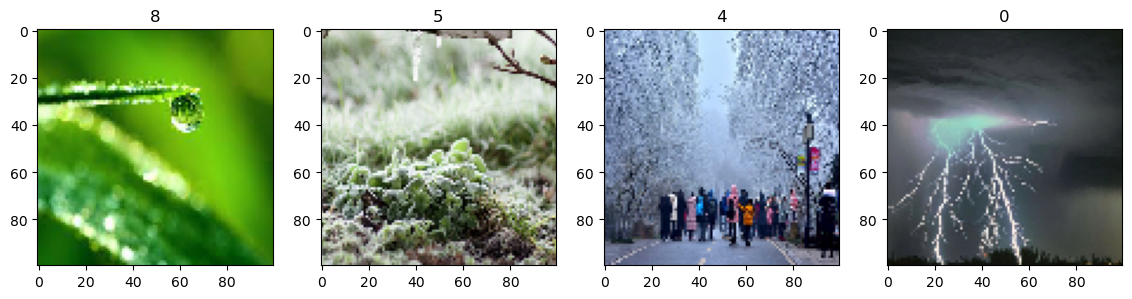

In [355]:
print("Training Data Examples:")
nrows, ncols = 1,4 
f, axs = plt.subplots(nrows, ncols, figsize=(14,12))
for i in range(ncols):
    axs[i].imshow(array_to_img(X_train[i]))
    axs[i].set(title=y_train[i])

Validation Data Examples:


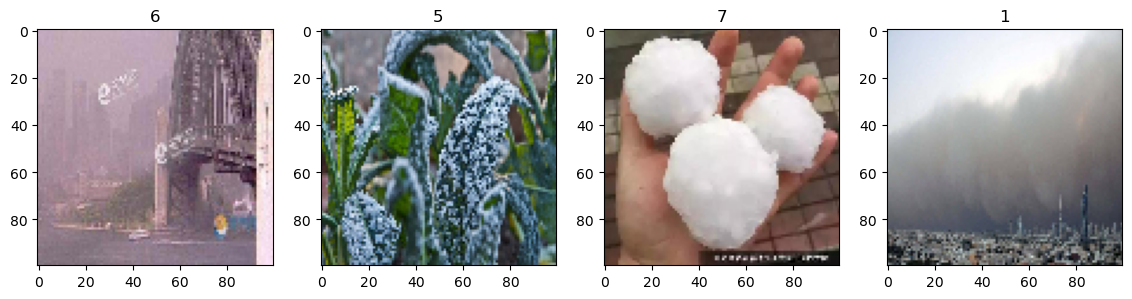

In [356]:
print('Validation Data Examples:')
nrows, ncols = 1,4 
f, axs = plt.subplots(nrows, ncols, figsize=(14,12))
for i in range(ncols):
    axs[i].imshow(array_to_img(X_val[i+30]))
    axs[i].set(title=y_val[i+30])

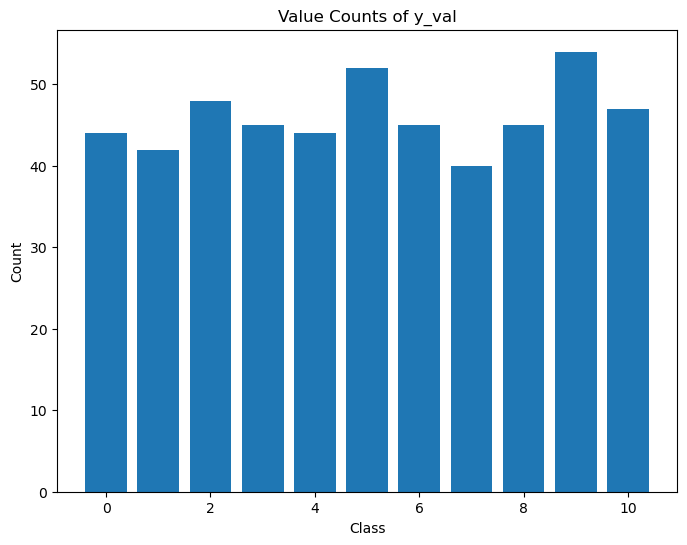

In [357]:
value_counts = np.bincount(y_val)
labels = np.arange(len(value_counts))

# Plot the value counts
plt.figure(figsize=(8, 6))
plt.bar(labels, value_counts)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Value Counts of y_val')
plt.show()

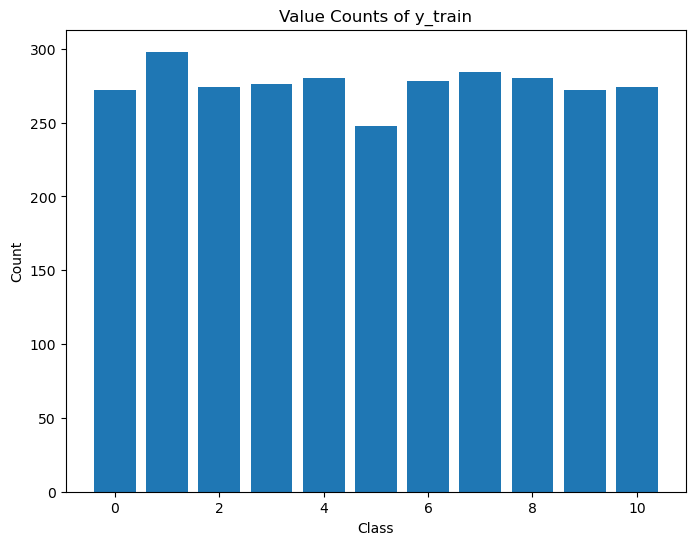

In [358]:
value_counts = np.bincount(y_train)
labels = np.arange(len(value_counts))

# Plot the value counts
plt.figure(figsize=(8, 6))
plt.bar(labels, value_counts)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Value Counts of y_train')
plt.show()

In [359]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(
    filters=32,
    kernel_size=(3, 3),
    strides=(1, 1),
    padding='same',
    data_format='channels_last',
    name='conv_1',
    activation='relu'))

model.add(tf.keras.layers.MaxPool2D(
    pool_size=(3, 3),
    name='pool_1'))

model.add(tf.keras.layers.Conv2D(
    filters=64,
    kernel_size=(3, 3),
    strides=(1, 1),
    padding='same',
    name='conv_2',
    activation='relu'))

model.add(tf.keras.layers.MaxPool2D(
    pool_size=(3, 3), name='pool_2')
)

model.add(tf.keras.layers.Flatten()) 

model.add(tf.keras.layers.Dense(
    units=1024,
    name='fc_1', 
    activation='relu'))

model.add(tf.keras.layers.Dropout(
    rate=0.5))

model.add(tf.keras.layers.Dense(
    units=11,
    name='fc_2',
    activation='softmax'))

tf.random.set_seed(1)
model.build(input_shape=(None, 100, 100, 3))
model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv2D)             (None, 100, 100, 32)      896       
                                                                 
 pool_1 (MaxPooling2D)       (None, 33, 33, 32)        0         
                                                                 
 conv_2 (Conv2D)             (None, 33, 33, 64)        18496     
                                                                 
 pool_2 (MaxPooling2D)       (None, 11, 11, 64)        0         
                                                                 
 flatten_25 (Flatten)        (None, 7744)              0         
                                                                 
 fc_1 (Dense)                (None, 1024)              7930880   
                                                                 
 dropout_25 (Dropout)        (None, 1024)            

In [360]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [361]:
print(y_val.shape)
print(y_train.shape)
print(X_val.shape)
print(X_train.shape)

(506,)
(3036,)
(506, 100, 100, 3)
(3036, 100, 100, 3)


In [362]:
tf.random.set_seed(1234)
np.random.seed(1234)
history = model.fit(X_train, y_train,
                    epochs=10, 
                    validation_data=(X_val, y_val))

Epoch 1/10
95/95 [==============================] - 13s 125ms/step - loss: 1.6304 - accuracy: 0.4588 - val_loss: 1.3873 - val_accuracy: 0.5435
Epoch 2/10
95/95 [==============================] - 14s 143ms/step - loss: 1.0414 - accuracy: 0.6462 - val_loss: 1.1457 - val_accuracy: 0.6225
Epoch 3/10
95/95 [==============================] - 12s 124ms/step - loss: 0.8483 - accuracy: 0.7049 - val_loss: 1.1060 - val_accuracy: 0.6462
Epoch 4/10
95/95 [==============================] - 11s 118ms/step - loss: 0.6790 - accuracy: 0.7642 - val_loss: 1.1900 - val_accuracy: 0.6383
Epoch 5/10
95/95 [==============================] - 11s 116ms/step - loss: 0.5170 - accuracy: 0.8228 - val_loss: 1.0091 - val_accuracy: 0.6660
Epoch 6/10
95/95 [==============================] - 11s 119ms/step - loss: 0.4025 - accuracy: 0.8676 - val_loss: 1.0009 - val_accuracy: 0.6937
Epoch 7/10
95/95 [==============================] - 13s 135ms/step - loss: 0.3117 - accuracy: 0.9025 - val_loss: 1.0180 - val_accuracy: 0.6917

16/16 [==============================] - 1s 43ms/step


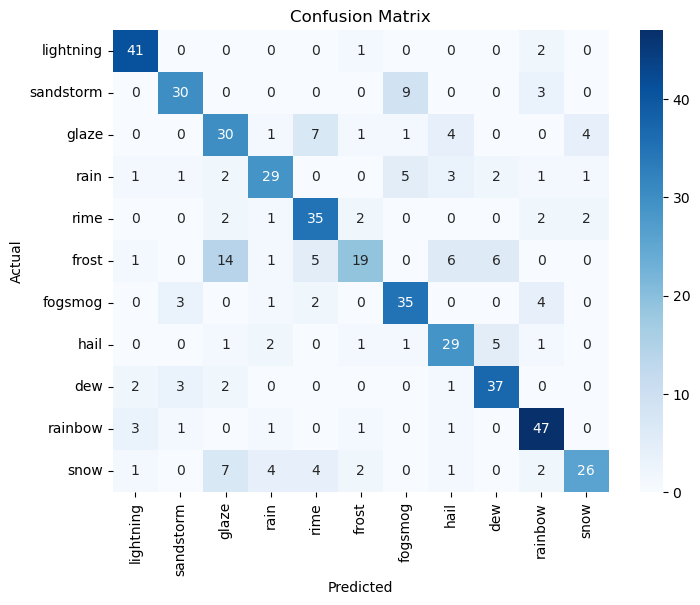

Class: lightning
Precision: 0.84
Recall: 0.93
F1-Score: 0.88

Class: sandstorm
Precision: 0.79
Recall: 0.71
F1-Score: 0.75

Class: glaze
Precision: 0.52
Recall: 0.62
F1-Score: 0.57

Class: rain
Precision: 0.72
Recall: 0.64
F1-Score: 0.68

Class: rime
Precision: 0.66
Recall: 0.80
F1-Score: 0.72

Class: frost
Precision: 0.70
Recall: 0.37
F1-Score: 0.48

Class: fogsmog
Precision: 0.69
Recall: 0.78
F1-Score: 0.73

Class: hail
Precision: 0.64
Recall: 0.72
F1-Score: 0.68

Class: dew
Precision: 0.74
Recall: 0.82
F1-Score: 0.78

Class: rainbow
Precision: 0.76
Recall: 0.87
F1-Score: 0.81

Class: snow
Precision: 0.79
Recall: 0.55
F1-Score: 0.65



In [371]:
class_to_numerical_label = {
    'lightning': 0,
    'sandstorm': 1,
    'glaze': 2,
    'rain': 3,
    'rime': 4,
    'frost': 5,
    'fogsmog': 6,
    'hail': 7,
    'dew': 8,
    'rainbow': 9,
    'snow': 10
}

y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1) 

cm = confusion_matrix(y_val, y_pred_classes)

class_labels = [label for label, _ in sorted(class_to_numerical_label.items(), key=lambda x: x[1])]

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

precision_scores = precision_score(y_val, y_pred_classes, average=None)
recall_scores = recall_score(y_val, y_pred_classes, average=None)
f1_scores = f1_score(y_val, y_pred_classes, average=None)

class_scores = {
    class_labels[i]: {
        'Precision': precision_scores[i],
        'Recall': recall_scores[i],
        'F1-Score': f1_scores[i]
    }
    for i in range(len(class_labels))
}

for class_label, scores in class_scores.items():
    print(f"Class: {class_label}")
    print(f"Precision: {scores['Precision']:.2f}")
    print(f"Recall: {scores['Recall']:.2f}")
    print(f"F1-Score: {scores['F1-Score']:.2f}")
    print()

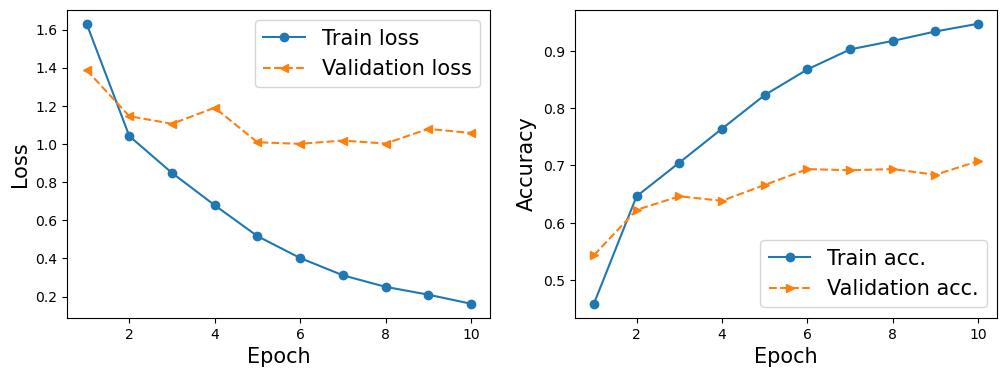

In [370]:
hist = history.history
x_arr = np.arange(len(hist['loss'])) + 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist['loss'], '-o', label='Train loss')
ax.plot(x_arr, hist['val_loss'], '--<', label='Validation loss')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist['accuracy'], '-o', label='Train acc.')
ax.plot(x_arr, hist['val_accuracy'], '-->', label='Validation acc.')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)
plt.show()

In [365]:
test_results = model.evaluate(X_test, y_test)
print('\nTest Acc. {:.2f}%'.format(test_results[1]*100))

16/16 [==============================] - 1s 39ms/step - loss: 1.1514 - accuracy: 0.6700

Test Acc. 67.00%
